# WINE QUALITY PREDICTION

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [2]:
df=pd.read_csv(r'C:\Users\HP\jupyter notebooks\kaggle\wine quality\winequality.csv')

In [3]:
df.shape

(1599, 12)

In [4]:
df.columns # the quality is the target variable that we have to predict.

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum() # no null or Nan values.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

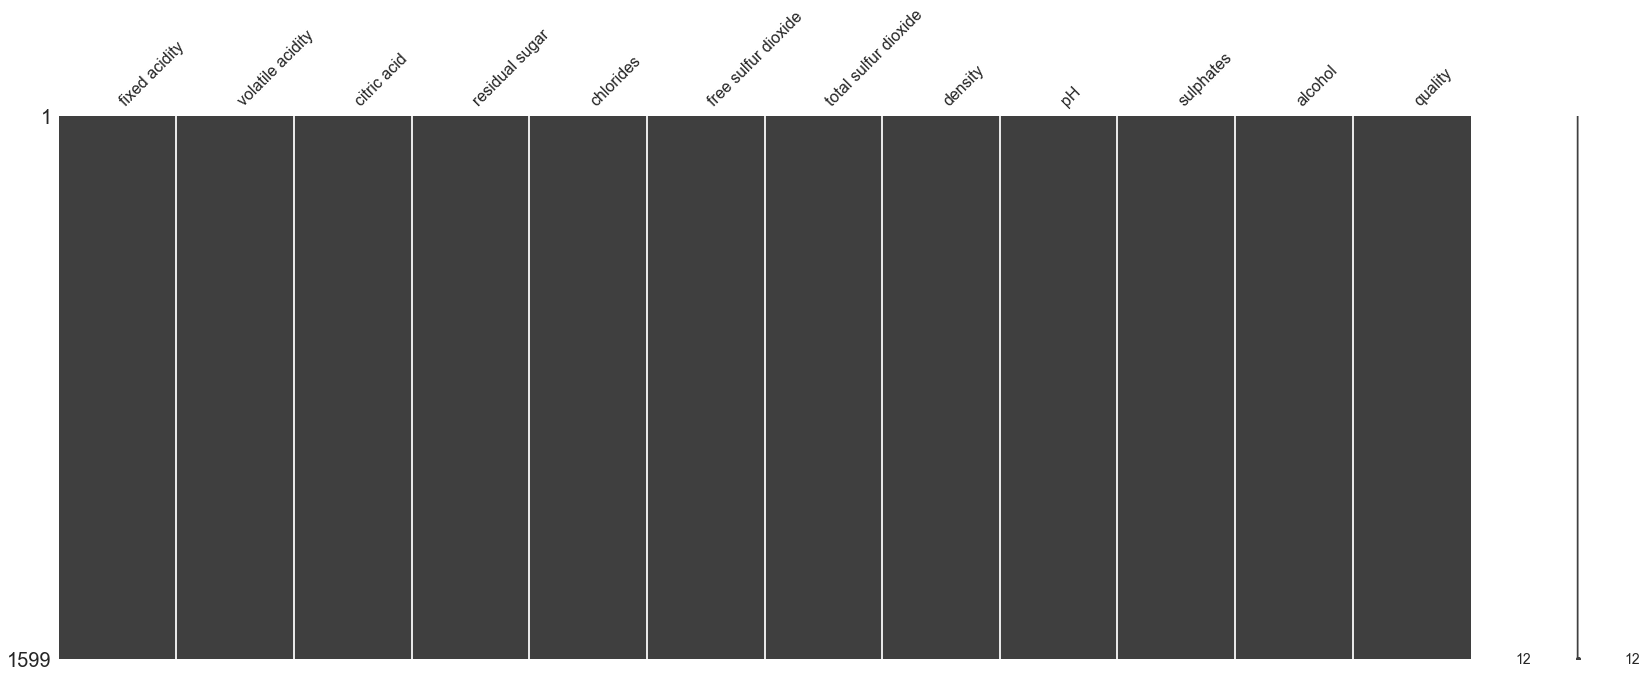

In [7]:
msno.matrix(df)  # just to visualize. no missing values.

#  NOW WE CAN VISUALIZE THE DISTRIBUTION OF VARIABLES

In [8]:
df.describe(include='all')

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

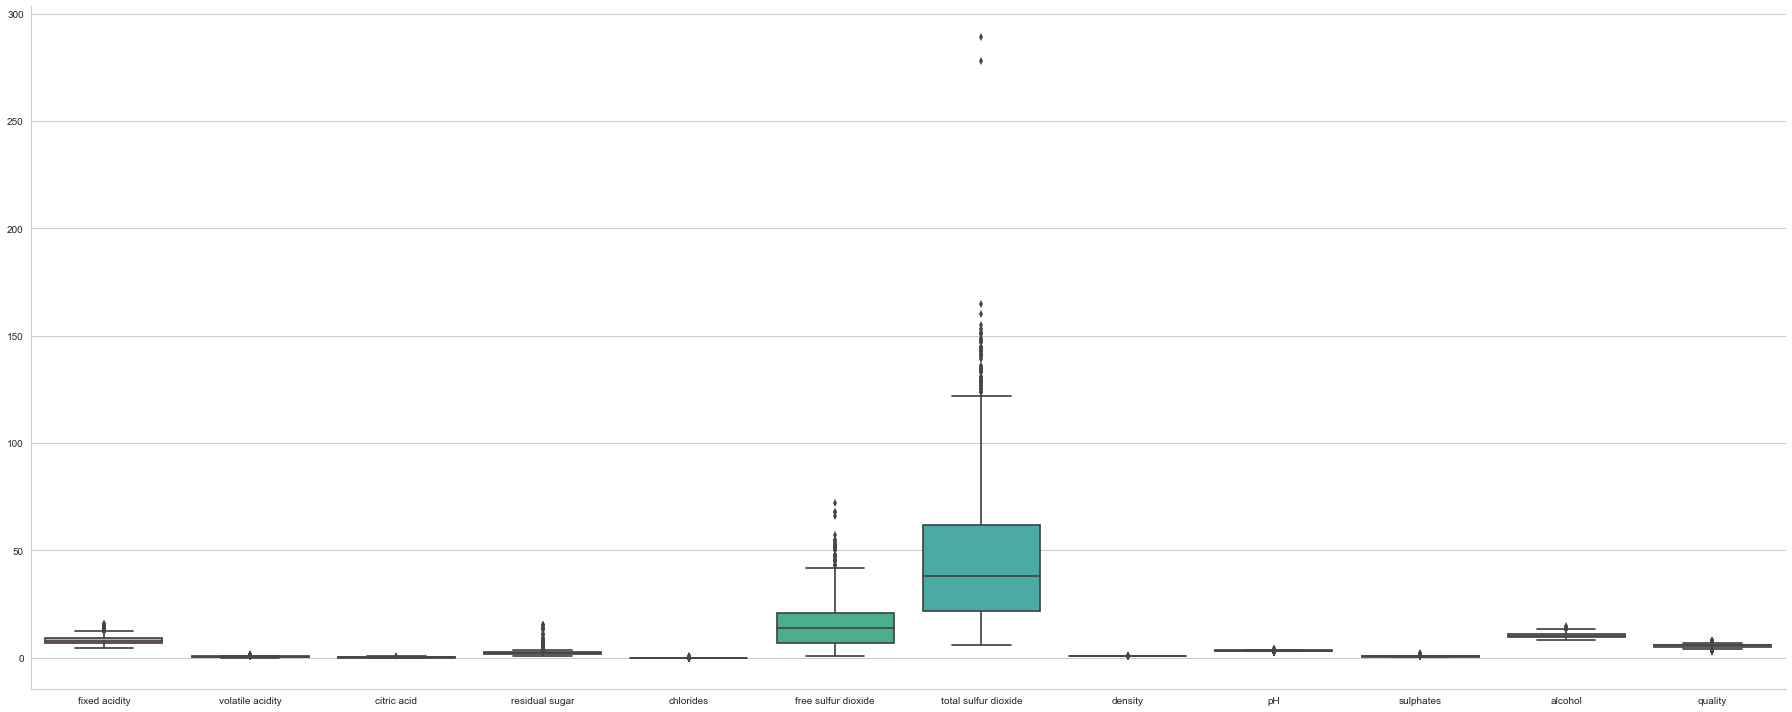

In [9]:
#fixed acidity.
sns.factorplot(data=df,kind='box',size=10,aspect=2.5) # the values are distributed over a very small scale.

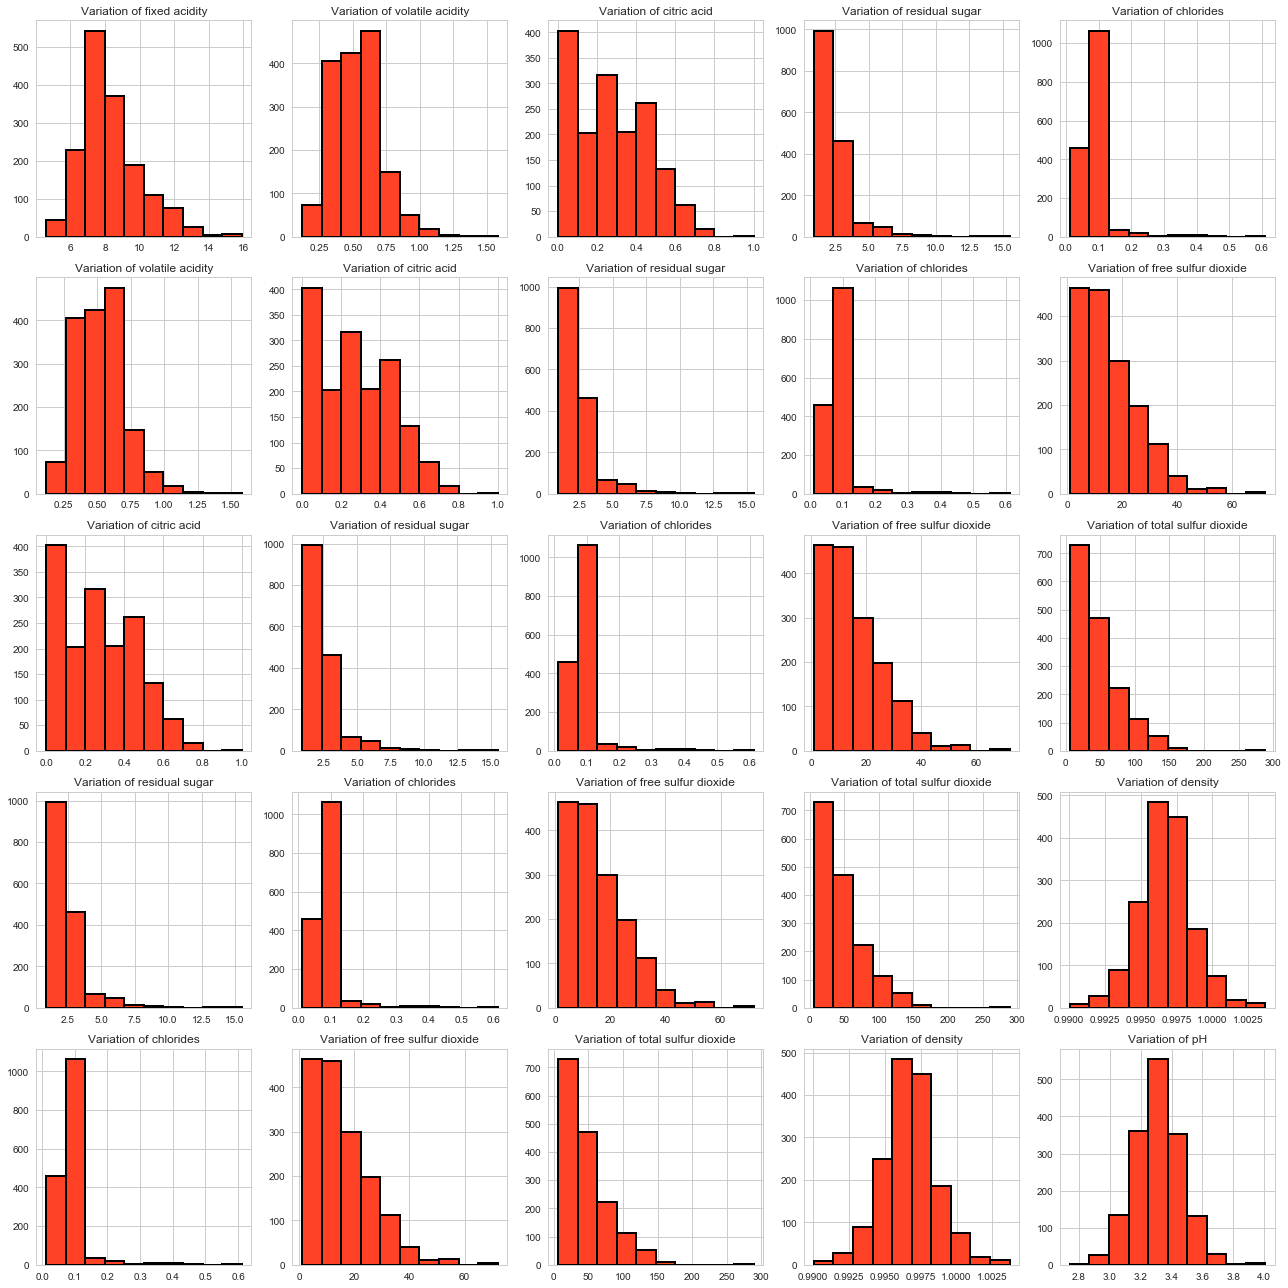

In [10]:
# using a histogram.
fig,axes=plt.subplots(5,5)
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
for i in range (5):
    for j in range (5):
        axes[i,j].hist(x=columns[i+j],data=df,edgecolor='#000000',linewidth=2,color='#ff4125')
        axes[i,j].set_title('Variation of '+columns[i+j])
fig=plt.gcf()
fig.set_size_inches(18,18)
fig.tight_layout()


#  NOW WE CAN SEE THE CORELATION BETWEEN DIFFERENT FEATURES BY USING A CORELATION MAP.

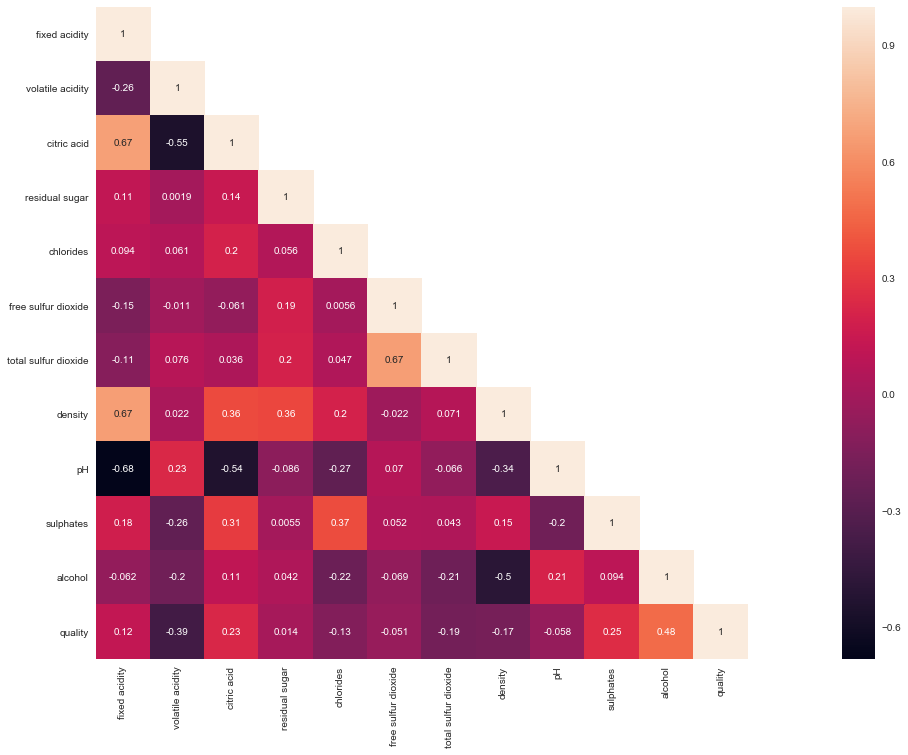

In [11]:
#corelation matrix.
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

# Observations from the above heat map indicate several key inferences:

The quality of wine exhibits a strong positive correlation with volatile acidity. This suggests that wines with higher levels of volatile acidity may tend to have lower quality.

Similarly, there is a notable positive correlation between the quality of wine and its alcohol content. Wines with higher alcohol levels are likely to be associated with better quality.

The pH level and citric acid/fixed acidity in wine demonstrate a significant inverse relationship. As commonly known, acidic substances have lower pH values, and this observation confirms that wines with higher levels of citric acid or fixed acidity are associated with lower pH values.

The self-relation of each feature is 1, as expected, indicating a perfect correlation of a feature with itself, which is a natural outcome.

The heat map may reveal additional similar inferences that can be drawn from the data, providing further insights into the relationships between different wine characteristics and their impact on wine quality.

In [12]:
# can remove some highly corelated features but for now let us keep them.

# NOW WE CAN VISUALIZE HOW QUALITY VARIES WITH DIFFERENT NUMERIC FEATURES.

In [13]:
def plot(feature_x,target='quality'):
    sns.factorplot(x=target,y=feature_x,data=df,kind='bar',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='violin',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='swarm',size=5,aspect=1)
    

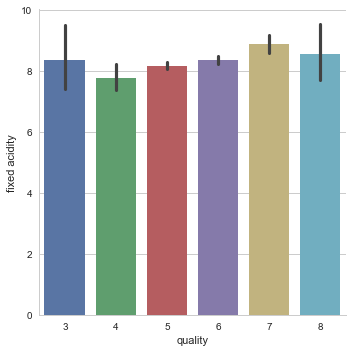

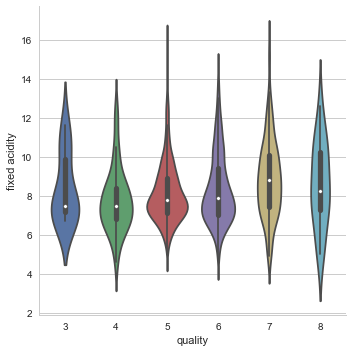

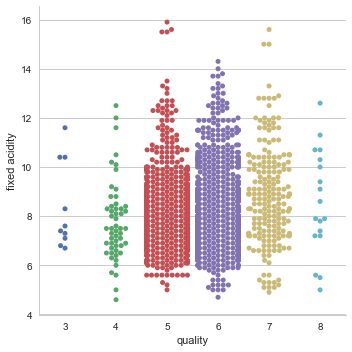

In [14]:
# for fixed acidity.
plot('fixed acidity','quality')

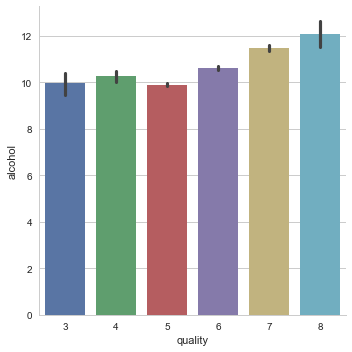

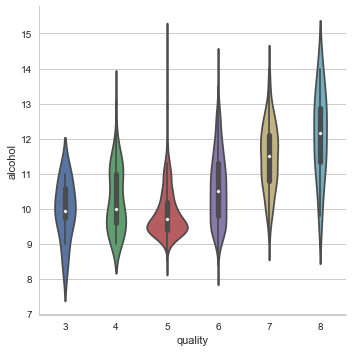

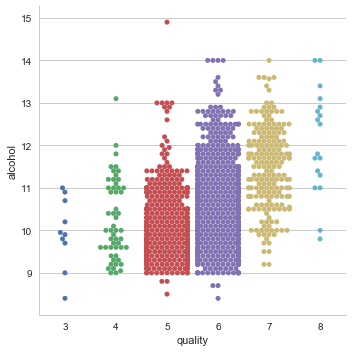

In [15]:
# for alcohol.
plot('alcohol','quality')

In [16]:
# similarly for other variables.

#  NOW WE CAN MOVE ONTO THE MODELLING PART AS DATA IS ALREADY PREPARED.

In [17]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [18]:
label_quality = LabelEncoder()

In [19]:
#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

In [20]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('quality',axis=1),df['quality'],test_size=0.25,random_state=42)

In [21]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
d

{'Modelling Algo': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.8775, 0.8775, 0.8725, 0.8625, 0.915, 0.8775, 0.8775, 0.8525]}

In [22]:
acc_frame=pd.DataFrame(d)
acc_frame

Modelling Algo  Accuracy
0          LogisticRegression    0.8775
1                   LinearSVM    0.8775
2                      rbfSVM    0.8725
3           KNearestNeighbors    0.8625
4      RandomForestClassifier    0.9150
5                DecisionTree    0.8775
6  GradientBoostingClassifier    0.8775
7                  GaussianNB    0.8525

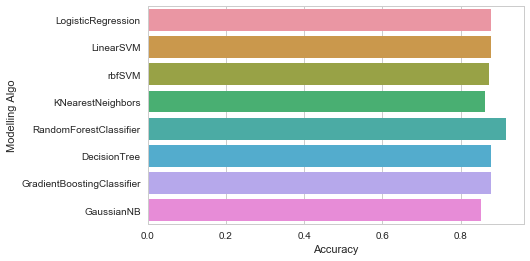

In [23]:
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

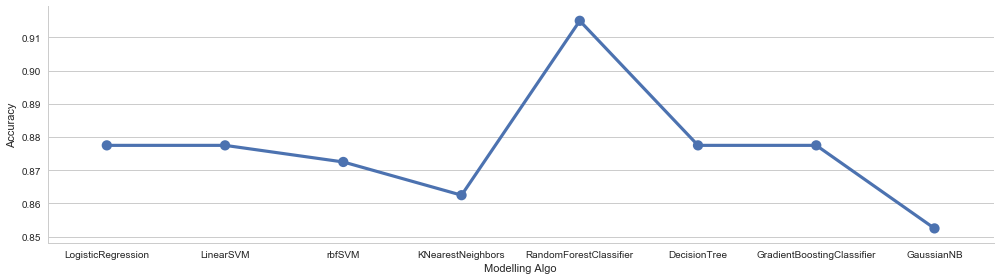

In [24]:
sns.factorplot(x='Modelling Algo',y='Accuracy',data=acc_frame,kind='point',size=4,aspect=3.5)

# NOTE THAT THIS IS WITHOUT FEATURE SCALING. NOW SINCE FEATURES HAVE DIFFERENT SCALES LET US TRY TO DO FEATURE SCALING AND SEE THE IMPACT.

In [25]:
def func(x_train,x_test,y_train,y_test,name_scaler):
    models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
    acc_sc=[]
    for model in range(len(models)):
        clf=models[model]
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_sc.append(accuracy_score(pred,y_test))
     
    acc_frame[name_scaler]=np.array(acc_sc)
    

In [26]:
scalers=[MinMaxScaler(),StandardScaler()]
names=['Acc_Min_Max_Scaler','Acc_Standard_Scaler']
for scale in range(len(scalers)):
    scaler=scalers[scale]
    scaler.fit(df)
    scaled_df=scaler.transform(df)
    X=scaled_df[:,0:11]
    Y=df['quality'].as_matrix()
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
    func(x_train,x_test,y_train,y_test,names[scale])
    
    

In [27]:
acc_frame

Modelling Algo  Accuracy  Acc_Min_Max_Scaler  \
0          LogisticRegression    0.8775              0.8750   
1                   LinearSVM    0.8775              0.8825   
2                      rbfSVM    0.8725              0.8675   
3           KNearestNeighbors    0.8625              0.8850   
4      RandomForestClassifier    0.9150              0.9100   
5                DecisionTree    0.8775              0.8800   
6  GradientBoostingClassifier    0.8775              0.8775   
7                  GaussianNB    0.8525              0.8425   

   Acc_Standard_Scaler  
0               0.8775  
1               0.8825  
2               0.8900  
3               0.8950  
4               0.9100  
5               0.8825  
6               0.8750  
7               0.8425

## NOW THIS CLEARLY SHOWS THE ACCUARCIES OF DIFFERENT MODELLING ALGOS ON USING DIFFERENT SCALERS.

1. Note that here the accuracies increase marginally on scaling.

2. Also for this data, StandardScaling seems to give slightly better results than the MinMaxScaling.

3. For some modelling algos there is a considerable increase in accuracies upon scaling the features like SVM, KNN wheras for others there isn't a considerable increase in accuracies upon scaling.

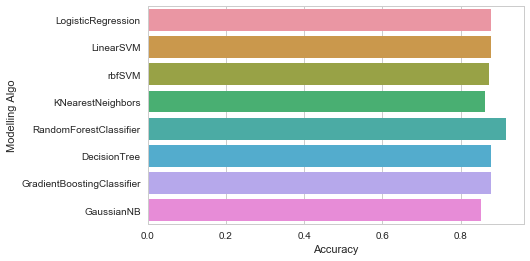

In [28]:
# just to visualize the accuracies.
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

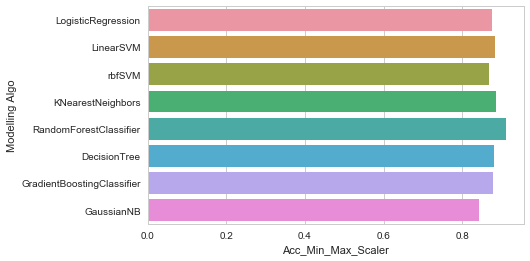

In [29]:
sns.barplot(y='Modelling Algo',x='Acc_Min_Max_Scaler',data=acc_frame)

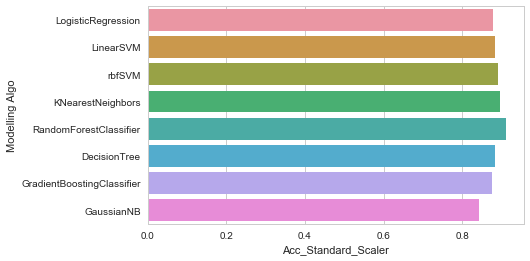

In [30]:
sns.barplot(y='Modelling Algo',x='Acc_Standard_Scaler',data=acc_frame)

In [31]:
# preparing the features by using a StandardScaler as it gave better resluts.
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)
X=scaled_df[:,0:11]
Y=df['quality'].as_matrix()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

#  NOW WE CAN MOVE ONTO PARAMETER TUNING PART.

###### 1.   LOGISTIC REGRESSION.

In [32]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [33]:
clf_lr.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [34]:
clf_lr.best_score_ # the best accuracy obtained by Grid search on the train set.

0.8824020016680567

In [35]:
clf_lr.grid_scores_

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.86322, std: 0.00307, params: {'C': 0.001, 'penalty': 'l1'},
 mean: 0.88157, std: 0.02363, params: {'C': 0.001, 'penalty': 'l2'},
 mean: 0.86322, std: 0.00307, params: {'C': 0.01, 'penalty': 'l1'},
 mean: 0.88157, std: 0.01747, params: {'C': 0.01, 'penalty': 'l2'},
 mean: 0.87656, std: 0.01404, params: {'C': 0.1, 'penalty': 'l1'},
 mean: 0.88240, std: 0.01753, params: {'C': 0.1, 'penalty': 'l2'},
 mean: 0.87573, std: 0.01364, params: {'C': 1, 'penalty': 'l1'},
 mean: 0.87740, std: 0.01493, params: {'C': 1, 'penalty': 'l2'},
 mean: 0.87740, std: 0.01493, params: {'C': 10, 'penalty': 'l1'},
 mean: 0.87740, std: 0.01493, params: {'C': 10, 'penalty': 'l2'},
 mean: 0.87740, std: 0.01493, params: {'C': 100, 'penalty': 'l1'},
 mean: 0.87740, std: 0.01493, params: {'C': 100, 'penalty': 'l2'},
 mean: 0.87740, std: 0.01493, params: {'C': 1000, 'penalty': 'l1'},
 mean: 0.87740, std: 0.01493, params: {'C': 1000, 'penalty': 'l2'}]

In [36]:
pred=clf_lr.predict(x_test)
accuracy_score(pred,y_test)

0.88

######   2. KNN.

In [37]:
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(x_train,y_train)


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [38]:
clf_knn.best_score_

0.8807339449541285

In [39]:
clf_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 1}

In [40]:
clf_knn.grid_scores_

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.88073, std: 0.02249, params: {'n_jobs': -1, 'n_neighbors': 1},
 mean: 0.87406, std: 0.02323, params: {'n_jobs': -1, 'n_neighbors': 2},
 mean: 0.86656, std: 0.02874, params: {'n_jobs': -1, 'n_neighbors': 3},
 mean: 0.87823, std: 0.02284, params: {'n_jobs': -1, 'n_neighbors': 4},
 mean: 0.86739, std: 0.02117, params: {'n_jobs': -1, 'n_neighbors': 5},
 mean: 0.86489, std: 0.01983, params: {'n_jobs': -1, 'n_neighbors': 6},
 mean: 0.86239, std: 0.02228, params: {'n_jobs': -1, 'n_neighbors': 7},
 mean: 0.86739, std: 0.02402, params: {'n_jobs': -1, 'n_neighbors': 8},
 mean: 0.86155, std: 0.01907, params: {'n_jobs': -1, 'n_neighbors': 9},
 mean: 0.86822, std: 0.01726, params: {'n_jobs': -1, 'n_neighbors': 10},
 mean: 0.86572, std: 0.02310, params: {'n_jobs': -1, 'n_neighbors': 11},
 mean: 0.86989, std: 0.02004, params: {'n_jobs': -1, 'n_neighbors': 12},
 mean: 0.86906, std: 0.01720, params: {'n_jobs': -1, 'n_neighbors': 13},
 mean: 0.86739, std: 0.01674, params: {'n_jobs': -1, 'n_neig

In [41]:
pred=clf_knn.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.89

###### 3. SUPPORT VECTOR MACHINE (SVM)

In [42]:
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [43]:
clf.best_score_

0.8999165971643036

In [44]:
clf.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [45]:
# now tuning finally around these values of C and gamma and the kernel for further increasing the accuracy.
params_dict={'C':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'gamma':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'kernel':['linear','rbf']}
clf_svm=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_svm.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.9, 0.92, 0.96, 0.98, 1.0, 1.2, 1.5], 'gamma': [0.9, 0.92, 0.96, 0.98, 1.0, 1.2, 1.5], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:
clf_svm.best_score_

0.9065888240200167

In [47]:
clf_svm.best_params_

{'C': 1.5, 'gamma': 0.9, 'kernel': 'rbf'}

In [48]:
clf_svm.grid_scores_

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.86322, std: 0.00307, params: {'C': 0.9, 'gamma': 0.9, 'kernel': 'linear'},
 mean: 0.89825, std: 0.01752, params: {'C': 0.9, 'gamma': 0.9, 'kernel': 'rbf'},
 mean: 0.86322, std: 0.00307, params: {'C': 0.9, 'gamma': 0.92, 'kernel': 'linear'},
 mean: 0.89825, std: 0.01752, params: {'C': 0.9, 'gamma': 0.92, 'kernel': 'rbf'},
 mean: 0.86322, std: 0.00307, params: {'C': 0.9, 'gamma': 0.96, 'kernel': 'linear'},
 mean: 0.89658, std: 0.01684, params: {'C': 0.9, 'gamma': 0.96, 'kernel': 'rbf'},
 mean: 0.86322, std: 0.00307, params: {'C': 0.9, 'gamma': 0.98, 'kernel': 'linear'},
 mean: 0.89825, std: 0.01623, params: {'C': 0.9, 'gamma': 0.98, 'kernel': 'rbf'},
 mean: 0.86322, std: 0.00307, params: {'C': 0.9, 'gamma': 1.0, 'kernel': 'linear'},
 mean: 0.89741, std: 0.01587, params: {'C': 0.9, 'gamma': 1.0, 'kernel': 'rbf'},
 mean: 0.86322, std: 0.00307, params: {'C': 0.9, 'gamma': 1.2, 'kernel': 'linear'},
 mean: 0.89491, std: 0.01848, params: {'C': 0.9, 'gamma': 1.2, 'kernel': 'rbf'},
 mea

In [49]:
pred=clf_svm.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.9175

In [ ]:
#### HENCE TILL NOW THE BEST ACCURACY IS GIVEN BY SVM WITH rbf KERNEL WITH  C=1.5 and gamma=0.90 .

######   4. RANDOM FOREST.

In [59]:
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [60]:
clf_rf.best_score_

0.9132610508757297

In [61]:
clf_rf.best_params_

{'max_features': 'auto', 'n_estimators': 500}

In [62]:
clf_rf.grid_scores_

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.91326, std: 0.02417, params: {'max_features': 'auto', 'n_estimators': 500},
 mean: 0.91159, std: 0.02208, params: {'max_features': 'sqrt', 'n_estimators': 500},
 mean: 0.91326, std: 0.02547, params: {'max_features': 'log2', 'n_estimators': 500}]

In [63]:
pred=clf_rf.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.9025

###### 5. GRADIENT BOOSTING.

In [68]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [70]:
clf_gb.best_score_

0.9099249374478732

In [71]:
clf_gb.best_params_

{'n_estimators': 500}

In [72]:
pred=clf_gb.predict(x_test)
accuracy_score(pred,y_test)

0.8875

## HENCE ON GIVEN PARAMETER TUNING THE SVM WITH rbf KERNEL GIVES THE HIGHEST ACCURACY OF 91.75%